# Лабораторная работа №1: Нечёткие множества

## Дисциплина: Интеллектуальные системы

### Выполнил студент группы НКАбд-01-22 Демидович Никита

**Задания:**

1. Реализация операции отсечения нечетких множеств (A¬B).
2. Привести свои примеры арифметических операций с нечеткими множествами.
3. Привести свои примеры нечетких правил работы экспертной системы.
4. Привести примеры нечеткого вывода (алгоритм Mamdani) для разработанных правил.

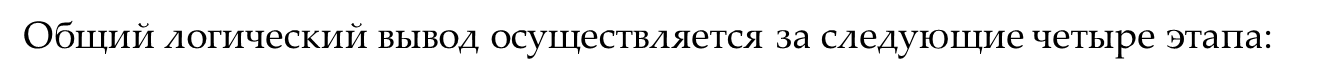
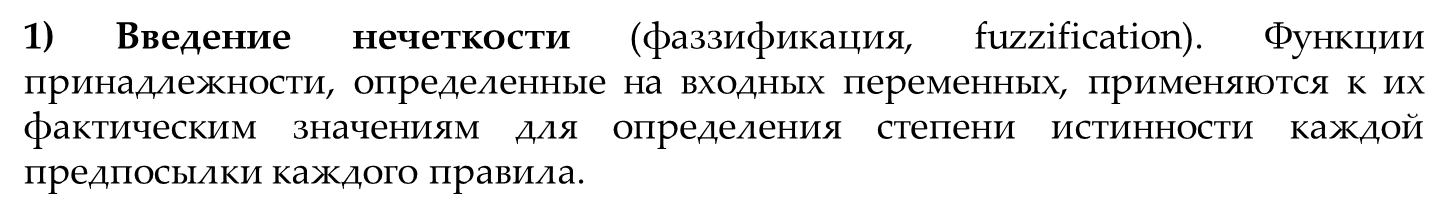
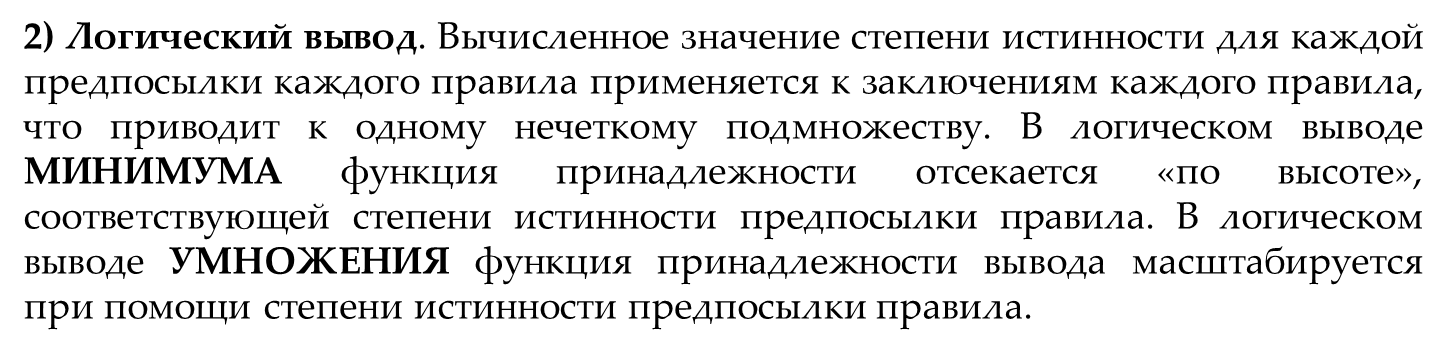
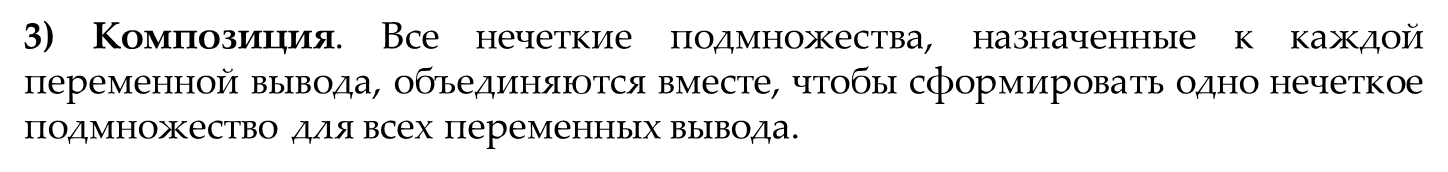
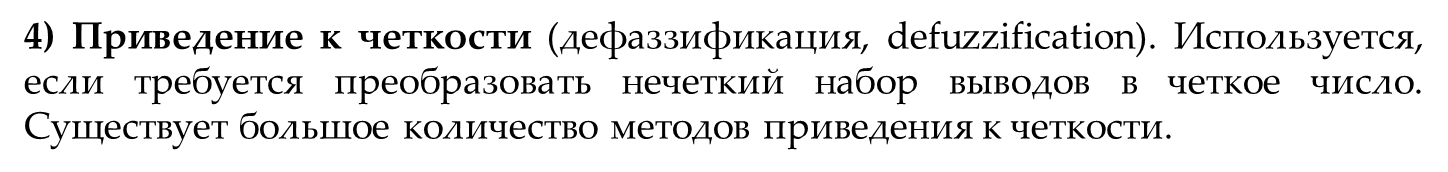

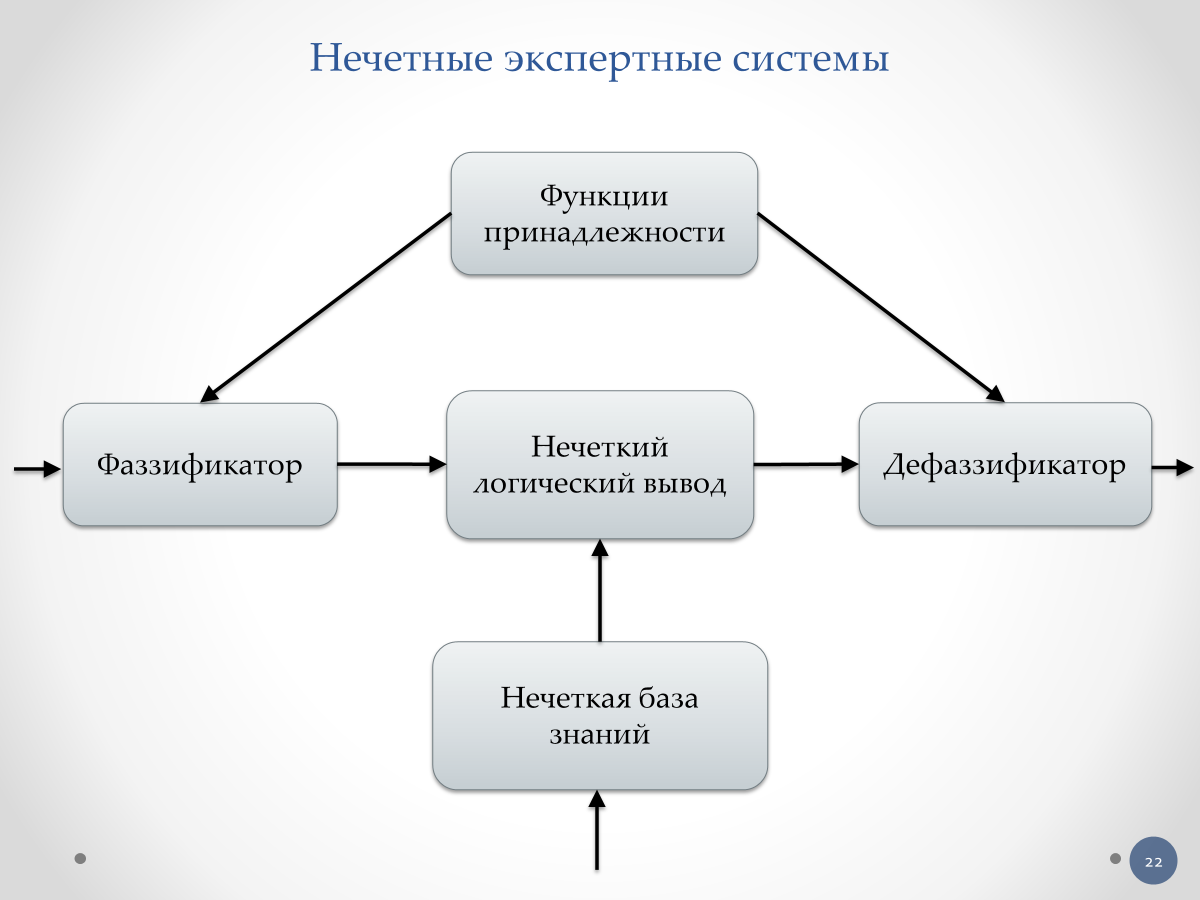

In [1]:
from matplotlib import pylab as plt
from matplotlib import colors
import numpy as np
import math
from itertools import product

In [2]:
def triangle_FS(U, a=None, b=None, c=None, d=None, h=1, form='equal'):
    # Функция triangle_FS принимает массив U и опциональные параметры a, b, c, d, h, form
    # a, b, c, d - границы треугольной функции принадлежности (Membership Function)
    # h - высота треугольной функции принадлежности
    # form - определяет форму треугольной функции принадлежности: 'equal' (равный), 'greater' (больше), 'less' (меньше)

    if form in ['equal', 'greater', 'less']:
        # Проверяем, что form находится в списке допустимых значений

        # Если параметр a не задан, устанавливаем его равным минимальному значению из массива U
        if a is None:
            a = U.min()
        
        # Если параметр d не задан, устанавливаем его равным максимальному значению из массива U
        if d is None:
            d = U.max()
        
        # Если параметр b не задан, и параметр c не задан, устанавливаем b в среднее между a и d
        # Если параметр c задан, устанавливаем b равным c
        if b is None:
            if c is None:
                b = (a + d) / 2.
            else:
                b = c
        
        # Если параметр c не задан, устанавливаем его равным b
        if c is None:
            c = b
        
        # Создаем словарь для хранения значений функции принадлежности
        Mu = dict()

        # Если a больше минимального значения в U
        if a > U.min():
            # Итерируемся по элементам U, меньшим или равным a, и устанавливаем соответствующие значения в Mu
            for el in U[U <= a]:
                Mu[el] = h if form == 'less' else 0.
        
        # Если d меньше максимального значения в U
        if d < U.max():
            # Итерируемся по элементам U, большим или равным d, и устанавливаем соответствующие значения в Mu
            for el in U[U >= d]:
                r = h if form == 'greater' else 0.
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        
        # Если a меньше b
        if a < b:
            # Итерируемся по элементам U, находящимся в диапазоне между a и b, и устанавливаем соответствующие значения в Mu
            for el in U[(U >= a) * (U <= b)]:
                r = 0. if form == 'greater' else h * float(el - a) / (b - a) if form == 'equal' else h * float(b - el) / (b - a)
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        
        # Если b меньше c
        if b < c:
            # Итерируемся по элементам U, находящимся в диапазоне между b и c, и устанавливаем соответствующие значения в Mu
            for el in U[(U >= b) * (U <= c)]:
                r = h if form == 'equal' else 0.
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        
        # Если c меньше d
        if c < d:
            # Итерируемся по элементам U, находящимся в диапазоне между c и d, и устанавливаем соответствующие значения в Mu
            for el in U[(U >= c) * (U <= d)]:
                r = 0. if form == 'less' else h * float(el - c) / (d - c) if form == 'greater' else h * float(d - el) / (d - c)
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        
        # Возвращаем словарь значений функции принадлежности
        return Mu
    else:
        # Если значение form не соответствует допустимым значениям, выводим сообщение об ошибке
        print('Unknown form')
        return None
    
#Этот код реализует функцию для вычисления треугольной функции принадлежности с заданными 
#параметрами a, b, c, d и формой form

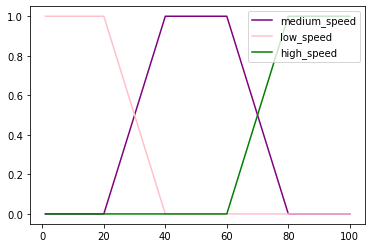

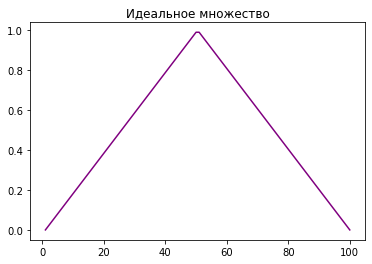

0.25


In [3]:
def FS_plot(FS, colors=colors.cnames.keys(), labels=None, title=None, name=None):
    # Функция FS_plot используется для построения графиков функций принадлежности.
    # FS - список словарей, представляющих функции принадлежности
    # colors - список цветов для графиков, по умолчанию используются цвета из словаря цветов cnames
    # labels - список меток для графиков
    # title - заголовок графика
    # name - имя файла для сохранения графика

    # Итерируемся по функциям принадлежности в списке FS
    for idx, el in enumerate(FS):
        # Преобразуем словарь функции принадлежности в массив и сортируем его по первому элементу
        mas = np.array(sorted(el.items(), key=lambda x: x[0])).T
        
        # Определяем метку для графика
        if labels is None:
            lab = ' '
        else:
            lab = labels[idx]
        
        # Создаем список цветов
        my_colors = ['purple', 'pink', 'green', 'blue', 'red', 'brown', 'black', 'magenta', 'yellow']
        
        # Строим график функции принадлежности с заданными параметрами
        plt.plot(mas[0], mas[1], color=(my_colors[idx]), label=lab)
    
    # Добавляем легенду, если указаны метки
    if not (labels is None):
        plt.legend(loc='upper right')
    
    # Добавляем заголовок, если он указан
    if not (title is None):
        plt.title(title)
    
    # Сохраняем график в файл, если указано имя
    if not (name is None):
        plt.savefig(name+'.png', format='png', dpi=100)
    
    # Отображаем график
    plt.show()

# Создаем массив значений от 1 до 100
Spr = np.arange(1, 101, 1)

# Вычисляем треугольные функции принадлежности с различными параметрами и формами
Pr1 = triangle_FS(Spr, a=20, b=40, c=60, d=80)
Pr2 = triangle_FS(Spr, a=20, b=40, c=60, d=80, form='less')
Pr3 = triangle_FS(Spr, a=20, b=40, c=60, d=80, form='greater')

# Строим графики функций принадлежности с метками
FS_plot([Pr1, Pr2, Pr3], labels=['medium_speed', 'low_speed', 'high_speed'])

# Вычисляем треугольную функцию принадлежности с параметрами по умолчанию
Pr4 = triangle_FS(Spr)

# Строим график идеального множества без меток и с заголовком
FS_plot([Pr4], title=u'Идеальное множество')

# Выводим значение функции принадлежности для элемента с индексом 25 из Pr1
print(Pr1[25])

#Этот код строит графики для различных треугольных функций принадлежности 
#и выводит значение функции принадлежности для элемента с определенным индексом.

In [4]:
def F_And(FV, method='minmax'):
    # Функция F_And принимает список значений функций принадлежности (FV) и метод для их комбинирования
    
    if method == 'minmax':
        # Если метод 'minmax', возвращаем минимальное значение из списка FV
        return np.min(FV)
    elif method == 'probability':
        # Если метод 'probability', возвращаем произведение всех значений из списка FV
        return np.product(FV)
    else:
        # Если метод неизвестен, выводим сообщение об ошибке
        print('Неизвестный метод ', method)
        return None
    
#Эта функция используется для комбинирования значений функций принадлежности с помощью различных методов. 
#В данном случае поддерживаются два метода: "minmax", который использует минимальное значение из списка, 
#и "probability", который использует произведение значений.

In [5]:
def F_Or(FV, method='minmax'):
    # Функция F_Or принимает список значений функций принадлежности (FV) и метод для их комбинирования
    
    if method == 'minmax':
        # Если метод 'minmax', возвращаем максимальное значение из списка FV
        return np.max(FV)
    elif method == 'probability':
        # Если метод 'probability', вычисляем произведение вероятностей отсутствия (1 - el) и возвращаем 1 минус это произведение
        mu = 0
        for el in FV:
            mu = mu + el - mu * el
        return mu
    else:
        # Если метод неизвестен, выводим сообщение об ошибке
        print('Неизвестный метод ', method)
        return None
    
'''
Эта функция используется для комбинирования значений функций принадлежности с помощью различных методов. 
В данном случае поддерживаются два метода: "minmax", который использует максимальное значение из списка, 
и "probability", который использует вероятностную операцию OR.
'''

'\nЭта функция используется для комбинирования значений функций принадлежности с помощью различных методов. \nВ данном случае поддерживаются два метода: "minmax", который использует максимальное значение из списка, \nи "probability", который использует вероятностную операцию OR.\n'

In [6]:
def F_Not (V1):
    return 1-V1

In [7]:
def alpha_srez(FS, alpha=0.5):
    # Функция alpha_srez принимает словарь значений функции принадлежности (FS) и пороговое значение alpha
    
    # Если alpha равно 0, устанавливаем очень маленькое значение, чтобы избежать деления на ноль
    alph = 1e-10 if alpha == 0. else alpha
    
    # Преобразуем словарь FS в массив и транспонируем его
    mas = np.array(list(FS.items())).T
    
    # Возвращаем множество элементов, у которых значение функции принадлежности больше или равно alpha
    return set(mas[0][mas[1] >= alph])

#Эта функция используется для вычисления альфа-среза для заданного значения функции принадлежности (alpha) 
#из словаря значений функции принадлежности (FS). Альфа-срез - это множество элементов, для которых 
#значение функции принадлежности больше или равно alpha.

In [8]:
def FS_moment(FS, centr=None):
    # Функция FS_moment вычисляет момент функции принадлежности FS.
    # FS - словарь значений функции принадлежности.
    # centr - центр масс, используемый для вычисления момента.
    
    # Преобразуем словарь FS в массив и транспонируем его
    mas = np.array(list(FS.items())).T
    
    if centr is None:
        # Если центр не задан, вычисляем глобальный центр масс
        Cntr_g = np.sum(mas[0] * mas[1]) / np.sum(mas[1])
    else:
        # Иначе используем заданный центр
        Cntr_g = centr
    
    # Возвращаем момент функции принадлежности
    return np.sum(mas[1] * np.square(mas[0] - Cntr_g))

#Эта функция используется для вычисления момента функции принадлежности. Момент характеризует форму 
#распределения и позволяет оценить положение центра масс множества. Если центр не указан, функция вычисляет 
#глобальный центр масс множества.

In [9]:
def FS_describe(FS, method='minmax', verbose=True):
    # Функция FS_describe предназначена для описания свойств функции принадлежности.
    # FS - словарь значений функции принадлежности.
    # method - метод, используемый для вычисления различных характеристик.
    # verbose - параметр, определяющий вывод информации о характеристиках (по умолчанию True).
    
    # Преобразование словаря FS в массив и транспонирование
    mas = np.array(list(FS.items())).T
    
    # Вычисление высоты функции принадлежности
    h = np.max(mas[1])
    
    # Вычисление мощности функции принадлежности
    N = np.sum(mas[1] > 0)
    
    # Вычисление минимального и максимального элементов
    Min_el = np.min(mas[0][mas[1] > 0])
    Max_el = np.max(mas[0][mas[1] > 0])
    
    # Вычисление первого, среднего и последнего максимумов
    Fst_max = np.min(mas[0][mas[1] == h])
    Lst_max = np.max(mas[0][mas[1] == h])
    Cntr_max = mas[0][mas[1] == h].mean()
    
    # Вычисление центра тяжести и момента инерции функции принадлежности
    Cntr_grav = np.sum(mas[0] * mas[1]) / np.sum(mas[1])
    Mmnt_in = FS_moment(FS)
    
    # Вычисление различных мер размытости
    R1 = -np.sum([0 if x == 0 else x * np.log2(x) for x in mas[1]])
    R1n = (2. * R1) / len(mas[1])
    R2 = 2. / len(mas[1]) * np.sum([F_And([x, F_Not(x)], method=method) for x in mas[1]])
    R3 = 2. / np.sqrt(len(mas[1])) * np.sqrt(np.sum([F_And([x, F_Not(x)], method=method) ** 2 for x in mas[1]]))
    
    # Если verbose=True, вывести описание характеристик функции принадлежности
    if verbose:
        print('Высота= ', h)
        print('Мощность= ', N)
        print('Диапазон значений: ', (Min_el, Max_el))
        print('Максимумы: ', (Fst_max, Cntr_max, Lst_max))
        print('Центр тяжести= ', Cntr_grav)
        print('Момент инерции= ', Mmnt_in)
        print('Размытость: ')
        print('Энтропийная мера= ', (R1, R1n))
        print('Альтернатива 1 (линейная)= ', R2)
        print('Альтернатива 2 (квадратичная)= ', R3)
    
    # Возвращаем характеристики функции принадлежности в виде кортежа
    return (h, N, (Min_el, Max_el), (Fst_max, Cntr_max, Lst_max), Cntr_grav, Mmnt_in, ((R1, R1n), R2, R3))


#print (alpha_srez (Pr1, alpha=0.5))
r = FS_describe(Pr1)

#print (FS_moment (Pr1, r[3][0]))
#print (FS_moment (Pr1, r[3][1]))
#print (FS_moment (Pr1, r[3][2]))

'''
D_pr1 = triangle_FS(Spr, b=0, c=100, h=0.5)
FS_plot([D_pr1], title = u'Максимально размытое множество', name='p6')
r=FS_describe(D_pr1)

D_pr2 = dict()
for el in Spr:
    D_pr2[el] = np.random.randint(2)
FS_plot([D_pr2], title = u'Случайное строгое множество', name='p6')
r=FS_describe(D_pr2)
'''

#Эта функция предназначена для описания свойств функции принадлежности, таких как высота, мощность, 
#диапазон значений, максимумы, центр тяжести, момент инерции и различные меры размытости.

Высота=  1.0
Мощность=  59
Диапазон значений:  (21.0, 79.0)
Максимумы:  (40.0, 50.0, 60.0)
Центр тяжести=  50.0
Момент инерции=  6660.0
Размытость: 
Энтропийная мера=  (14.355046155633588, 0.28710092311267177)
Альтернатива 1 (линейная)=  0.2
Альтернатива 2 (квадратичная)=  0.3660601043544625


"\nD_pr1 = triangle_FS(Spr, b=0, c=100, h=0.5)\nFS_plot([D_pr1], title = u'Максимально размытое множество', name='p6')\nr=FS_describe(D_pr1)\n\nD_pr2 = dict()\nfor el in Spr:\n    D_pr2[el] = np.random.randint(2)\nFS_plot([D_pr2], title = u'Случайное строгое множество', name='p6')\nr=FS_describe(D_pr2)\n"

In [10]:
def FS_quantificator(FS, quantificators=[u'очень']):
    # Функция FS_quantificator принимает словарь значений функции принадлежности (FS)
    # и список квантификаторов, которые будут применены к функции принадлежности.
    
    # Преобразование словаря FS в массив и транспонирование
    mas = np.array(list(FS.items())).T
    
    # Итерация по квантификаторам в обратном порядке (с конца списка)
    for el in np.flip(quantificators, axis=0):
        if el == u'очень':
            # Если квантификатор "очень", квадратируем значения функции принадлежности
            mas[1] = np.square(mas[1])
        elif el == u'наверное':
            # Если квантификатор "наверное", берем квадратный корень от значений функции принадлежности
            mas[1] = np.sqrt(mas[1])
        elif el == u'не':
            # Если квантификатор "не", берем 1 минус значение функции принадлежности
            mas[1] = 1 - mas[1]
        else:
            # Если указан неизвестный квантификатор, выводим сообщение об ошибке
            print('Неизвестный квантификатор ', el, '. Должно быть очень, наверное или не')
    
    # Преобразуем массив обратно в словарь и возвращаем его
    return dict(mas.T)


'''
quants=[[u'не'], [u'очень'], [u'наверное']]
labels=[u'не', u'очень', u'наверное']
FS_plot([FS_quantificator(Pr1, quantificators=x) for x in quants], labels=labels)

quants=[[u'не', u'очень'], [u'очень', u'не'], [u'наверное', u'не', u'очень']]
labels=[u'не очень', u'очень не', u'наверное не очень']
FS_plot([FS_quantificator(Pr1, quantificators=x) for x in quants], labels=labels)
'''

#Эта функция применяет квантификаторы к значениям функции принадлежности. 
#Квантификаторы могут быть "очень", "наверное" или "не". Квантификатор "очень" увеличивает 
#степень принадлежности, "наверное" уменьшает ее, а "не" инвертирует ее.

"\nquants=[[u'не'], [u'очень'], [u'наверное']]\nlabels=[u'не', u'очень', u'наверное']\nFS_plot([FS_quantificator(Pr1, quantificators=x) for x in quants], labels=labels)\n\nquants=[[u'не', u'очень'], [u'очень', u'не'], [u'наверное', u'не', u'очень']]\nlabels=[u'не очень', u'очень не', u'наверное не очень']\nFS_plot([FS_quantificator(Pr1, quantificators=x) for x in quants], labels=labels)\n"

In [11]:
def FS_union(FSs, Ps=None, method='minmax'):
    # Функция FS_union принимает список функций принадлежности (FSs),
    # список весовых коэффициентов (Ps) и метод комбинирования (method).

    # Создаем пустое множество для объединенных значений
    U = set()
    for FS in FSs:
        # Объединяем ключи из всех функций принадлежности в одно множество
        U = set.union(U, FS.keys())
    
    # Создаем пустой словарь для результата
    res = dict()
    for el in U:
        s_mu = []
        for idx, FS in enumerate(FSs):
            # Если Ps не задан, считаем, что вес равен 1
            p = 1 if Ps is None else Ps[idx]
            # Для каждой функции принадлежности считаем степень принадлежности с учетом веса
            s_mu.append(F_And([p, FS.get(el, 0)], method=method))
        # Объединяем степени принадлежности для каждой функции методом "или"
        res[el] = F_Or(s_mu, method=method)
    return res

#Эта функция объединяет несколько функций принадлежности в одну функцию принадлежности, используя заданные 
#весовые коэффициенты и метод комбинирования. Ключи всех функций принадлежности объединяются в одно множество, 
#а затем для каждого ключа вычисляется новое значение функции принадлежности с учетом весов и метода комбинирования.

In [12]:
def FS_intersection(FSs, Ps=None, method='minmax'):
    # Функция FS_intersection принимает список функций принадлежности (FSs),
    # список вероятностей (Ps), и метод для операции пересечения.
    
    # Инициализация пустого множества для всех возможных значений
    U = set()
    for FS in FSs:
        # Объединение всех ключей из FSs
        U = set.union(U, FS.keys())
    
    # Инициализация пустого словаря для результата
    res = dict()
    
    # Итерация по всем элементам в объединенном множестве U
    for el in U:
        s_mu = []
        # Итерация по всем функциям принадлежности в FSs
        for idx, FS in enumerate(FSs):
            # Вычисление вероятности p, если указан список вероятностей
            p = 1 if Ps is None else Ps[idx]
            # Вычисление минимума между p и значением функции принадлежности для текущего элемента
            s_mu.append(F_And([p, FS.get(el, 0)], method=method))
        # Вычисление пересечения (логического И) для всех значений s_mu и добавление результата в словарь
        res[el] = F_And(s_mu, method=method)
    return res

'''
FS_plot([Pr1, Pr2], labels=[u'Equal', u'Less'], title=u'Исходные множества')
FS_plot([FS_intersection([Pr1,Pr2], Ps=[1,1], method='minmax'), FS_union([Pr1,Pr2], Ps=[1,1], method='minmax')], labels=[u'Пересечение', u'Объединение'], title=u'Минимаксный подход')
FS_plot([FS_intersection([Pr1,Pr2], Ps=[1,1], method='probability'), FS_union([Pr1,Pr2], Ps=[1,1], method='probability')], labels=[u'Пересечение', u'Объединение'], title=u'Вероятностный подход')
'''

'''
p=0.4
otv1=FS_union([Pr1,Pr2], Ps=[p,1-p], method='minmax')
otv2=FS_union([Pr1,Pr2], Ps=[p,1-p], method='probability')
FS_plot([otv1, otv2], labels=[u'минимаксный', u'вероятностный'], title=u'Первая задача, p='+str(p))
'''

#Эта функция вычисляет пересечение нечетких множеств, представленных функциями принадлежности. Она принимает 
#список таких множеств (FSs), список вероятностей (Ps) и метод (например, "minmax") для операции пересечения.

"\np=0.4\notv1=FS_union([Pr1,Pr2], Ps=[p,1-p], method='minmax')\notv2=FS_union([Pr1,Pr2], Ps=[p,1-p], method='probability')\nFS_plot([otv1, otv2], labels=[u'минимаксный', u'вероятностный'], title=u'Первая задача, p='+str(p))\n"

In [13]:
def FS_arifm_operation_Num(FS, num, Func=lambda x, y: x + y):
    # Функция FS_arifm_operation_Num принимает функцию принадлежности FS и число num,
    # а затем применяет к каждому значению в FS указанную функцию (по умолчанию операция сложения).
    
    # Преобразование словаря FS в массив и транспонирование
    mas1 = np.array(list(FS.items())).T
    
    # Применение указанной функции (Func) к значениям FS и num
    mas1[0] = Func(mas1[0], num)
    
    # Возврат нового словаря с обновленными значениями функции принадлежности
    return dict(mas1.T)

# Создание массива значений для гири
Giri = np.array([8., 12., 16., 24., 32., 48., 64., 72., 128.])

# Генерация функций принадлежности для легкой и тяжелой гири
l_Giri = triangle_FS(Giri, b=8., d=64., h=1, form='equal')
h_Giri = triangle_FS(Giri, b=16., d=64., h=1, form='greater')

# Умножение значений функции принадлежности для легкой гири на 2
l2_Giri = FS_arifm_operation_Num(l_Giri, 2, Func=lambda x, y: x * y)

#Этот код выполняет операцию арифметического действия над значениями функции принадлежности и числом. 
#В данном случае оно умножает каждое значение функции принадлежности для легкой гири на 2.

#### Пример работы нечетких правил экспертной системы

In [14]:
def FS_arifm_operation_Set(FS1, FS2, Func=lambda x, y: x + y, method='minmax', clearing=False):
    # Функция FS_arifm_operation_Set принимает два словаря функций принадлежности FS1 и FS2,
    # функцию Func для выполнения арифметической операции над элементами множеств,
    # метод для выполнения операции (например, 'minmax' или 'probability') и параметр очистки (clearing).
    
    # Инициализация пустого словаря для результата
    res = dict()
    
    # Перебор всех комбинаций пар элементов из FS1 и FS2
    for p1, p2 in list(product(FS1.keys(), FS2.keys())):
        # Вычисление значения функции принадлежности для текущей пары элементов с помощью указанной функции Func
        new_value = Func(p1, p2)
        
        # Обновление словаря результата с помощью операции OR (логического ИЛИ)
        res[new_value] = F_Or([F_And([FS1[p1], FS2[p2]], method=method), res.get(new_value, 0)], method=method)
    
    # Если установлен параметр очистки, выполняем очистку результатов
    if clearing:
        # Инициализация пустых словарей для двух новых результатов (res1 и res2)
        res1 = dict()
        res2 = dict()
        
        # Сортировка словаря res в порядке убывания по ключам
        mas_T = sorted(res.items(), reverse=True, key=lambda x: x[0])
        mu = -1
        # Перебор элементов в отсортированном списке
        for el in mas_T:
            # Если значение функции принадлежности больше или равно текущему максимуму, добавляем его в res1
            if el[1] >= mu:
                res1[el[0]] = el[1]
                mu = el[1]
            
        # Сортировка словаря res в порядке возрастания по ключам
        mas_T = sorted(res.items(), reverse=False, key=lambda x: x[0])
        mu = -1
        # Перебор элементов в отсортированном списке
        for el in mas_T:
            # Если значение функции принадлежности больше или равно текущему максимуму, добавляем его в res2
            if el[1] >= mu:
                res2[el[0]] = el[1]
                mu = el[1]
        
        # Возвращаем объединение результатов res1 и res2 с помощью функции FS_union
        return FS_union([res1, res2])
    else:
        # Возвращаем результат без очистки
        return res

'''
Эта функция выполняет арифметическую операцию над двумя функциями принадлежности FS1 и FS2. 
Она принимает функцию для выполнения операции (по умолчанию это сложение), метод вычисления 
(например, 'minmax' или 'probability') и флаг очистки (clearing), который определяет, нужно ли очищать 
результаты после выполнения операции.
'''

'''
l21_Giri=FS_arifm_operation_Set(l_Giri, l_Giri, clearing=True)
FS_plot([l2_Giri, l21_Giri], labels=[u'2*легкая', u'легкая+легкая'], title=u'2 лекгие гири')

lh_Giri=FS_arifm_operation_Set(l_Giri, h_Giri)
FS_plot([lh_Giri], title=u'тяжелая + легкая гири(без очистки)')

lhc_Giri=FS_arifm_operation_Set(l_Giri, h_Giri, clearing=True)
FS_plot([lhc_Giri], title=u'тяжелая + легкая гири(с очисткой)')
'''


'''
Нечеткий вывод
'''

# Создание массива значений температуры от 1 до 40 с шагом 0.25
Stemp = np.arange(1, 41, 0.25)

# Генерация функций принадлежности для различных температурных условий: тепло, холодно и жарко
Teplo = triangle_FS(Stemp, a=10, b=20, d=30)  # Тепло - температура от 10 до 30
Holodno = triangle_FS(Stemp, a=10, b=20, d=30, form='less')  # Холодно - температура менее 20
Zharko = triangle_FS(Stemp, a=10, b=20, d=30, form='greater')  # Жарко - температура более 20

# Визуализация функций принадлежности на графике
#FS_plot([Teplo, Holodno, Zharko], labels=[u'Тепло', u'Холодно', u'Жарко'])

In [15]:
def FS_func(FSx, Uy, Func=lambda x, Ux, Uy: np.array([1] * len(Uy)), method='minmax'):
    # Функция FS_func принимает функцию принадлежности FSx для множества X,
    # множество значений Uy для множества Y, функцию Func и метод вычисления (например, 'minmax' или 'probability').
    
    # Преобразование словаря FSx в список кортежей
    masx = list(FSx.items())
    
    # Получение значений множества X из списка кортежей masx
    Ux = np.array(masx).T[0]
    
    # Инициализация массива masmu для значений множества Y
    masmu = np.array([0] * len(Uy))
    
    # Выбор метода вычисления
    if method == 'minmax':
        # Если выбран метод 'minmax', вычисляем значения функции принадлежности для множества Y по принципу minmax
        for el in Ux:
            mm = np.min([Func(el, Ux, Uy), [FSx[el]] * len(Uy)], axis=0)
            masmu = np.max([masmu, mm], axis=0)
    elif method == 'probability':
        # Если выбран метод 'probability', вычисляем значения функции принадлежности для множества Y по принципу вероятности
        for el in Ux:
            mm = Func(el, masx, Uy) * FSx[el]
            masmu = masmu + mm - masmu * mm
    else:
        # Если указан неизвестный метод, выводим сообщение об ошибке
        print('Неизвестный метод', method)
    
    # Возвращаем словарь с массивом значений множества Y и соответствующими значениями функции принадлежности
    return dict(np.array([Uy, masmu]).T)

#Эта функция применяет функцию принадлежности FSx для множества X к новому множеству значений Y с помощью функции 
#Func. Она поддерживает два метода вычисления: 'minmax' (минимум по максимумам) и 'probability' (вероятностное).

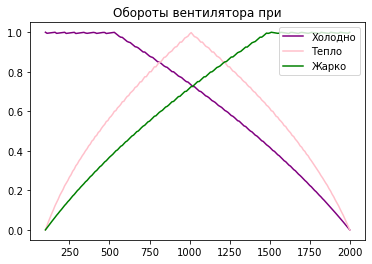

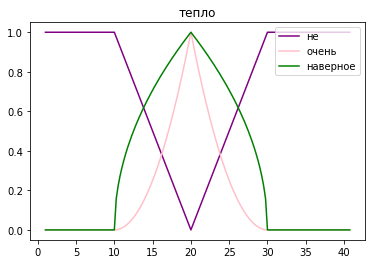

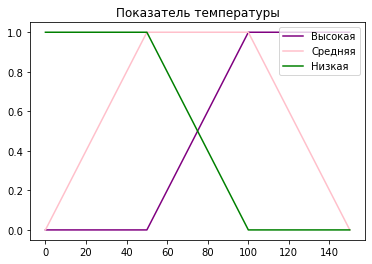

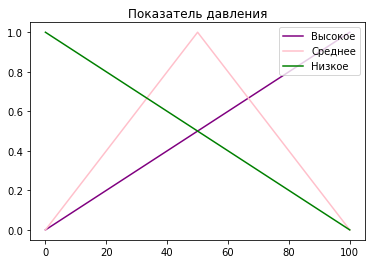

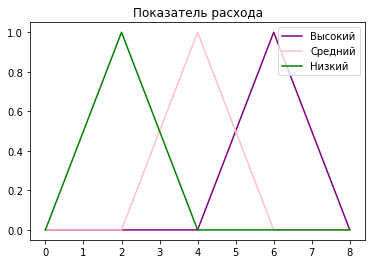

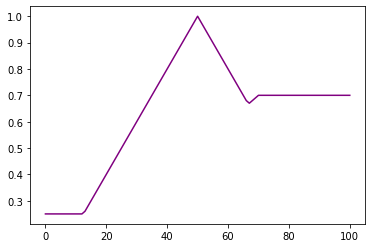

Высота=  1.0
Мощность=  101
Диапазон значений:  (0.0, 100.0)
Максимумы:  (50.0, 50.0, 50.0)
Центр тяжести=  56.35134714218968
Момент инерции=  41545.7336084722
Размытость: 
Энтропийная мера=  (36.03196031268871, 0.7135041646076973)
Альтернатива 1 (линейная)=  0.5380198019801979
Альтернатива 2 (квадратичная)=  0.5774062865972107


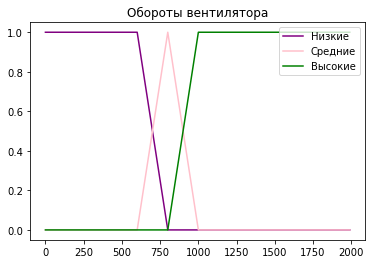

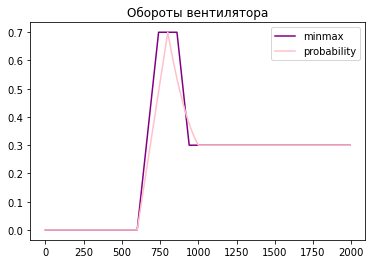

На основе минимаксного подхода
Высота=  0.7
Мощность=  139
Диапазон значений:  (610.0, 1990.0)
Максимумы:  (740.0, 800.0, 860.0)
Центр тяжести=  1228.6516853932587
Момент инерции=  8151791.011235956
Размытость: 
Энтропийная мера=  (69.15801732545745, 0.6915801732545745)
Альтернатива 1 (линейная)=  0.42549999999999993
Альтернатива 2 (квадратичная)=  0.5172523562053633
На основе вероятностного подхода
Высота=  0.7
Мощность=  139
Диапазон значений:  (610.0, 1990.0)
Максимумы:  (800.0, 800.0, 800.0)
Центр тяжести=  1258.2854387970126
Момент инерции=  7436338.591772007
Размытость: 
Энтропийная мера=  (70.32921661205214, 0.7032921661205214)
Альтернатива 1 (линейная)=  0.43562749999999995
Альтернатива 2 (квадратичная)=  0.5335897265924447


In [17]:
# Определение функции принадлежности FS_f
def FS_f(x, Ux, Uy):
    # Функция принимает x (значение), Ux (множество значений x) и Uy (множество значений y)
    
    # Нахождение минимальных и максимальных значений
    minx = np.min(Ux)
    maxx = np.max(Ux)
    miny = np.min(Uy)
    maxy = np.max(Uy)
    
    # Вычисление значения функции принадлежности для x
    k = float(x - minx) / float(Ux.max() - minx)
    gran = k * (maxy - miny) + miny

    arr1 = np.array([], 'float64')
    
    # Определение функции принадлежности для каждого элемента из Uy
    for y in Uy:
        if y == gran:
            arr1 = np.append(arr1, 1.)
        elif y < gran:
            arr1 = np.append(arr1, float(y - miny) / (gran - miny))
        else:
            arr1 = np.append(arr1, float(maxy - y) / (maxy - gran))
    
    return arr1

# Создание массива оборотов вентилятора
Oboroti = np.arange(100, 2001, 10)

# Визуализация функций принадлежности для температурных условий: холодно, тепло, жарко
FS_plot([FS_func(Holodno, Oboroti, Func=FS_f), FS_func(Teplo, Oboroti, Func=FS_f), FS_func(Zharko, Oboroti, Func=FS_f)], labels=[u'Холодно', u'Тепло', u'Жарко'], title=u'Обороты вентилятора при')

# Определение квантификаторов
quants = [[u'не'],[u'очень'],[u'наверное']]

# Визуализация функций принадлежности с квантификаторами для температурного условия "тепло"
FS_plot( [FS_quantificator(Teplo, quantificators=x) for x in quants], labels=[u'не',u'очень',u'наверное'], title=u'тепло')

# Визуализация функций принадлежности с квантификаторами для температурного условия "тепло" на основе функции принадлежности FS_f
#FS_plot( [FS_func(FS_quantificator(Teplo, quantificators=x), Oboroti, Func=FS_f) for x in quants], labels=[u'не',u'очень',u'наверное'], title=u'обороты вентилятора при тепло')

# Создание функций принадлежности для показателя температуры (высокая, средняя, низкая)
S_T = np.arange(0., 151., 1.)
T_high = triangle_FS(S_T, b=50., d=100., h=1, form='greater')
T_middle = triangle_FS(S_T, b=50., c=100., h=1, form='equal')
T_low = triangle_FS(S_T, a=50., b=100., h=1, form='less')

# Визуализация функций принадлежности для показателя температуры
FS_plot([T_high, T_middle, T_low], labels=[u'Высокая', u'Средняя', u'Низкая'], title=u'Показатель температуры')

# Создание функций принадлежности для показателя давления (высокое, среднее, низкое)
S_T = np.arange(0., 101., 1.)
P_high = triangle_FS(S_T, b=0., h=1, form='greater')
P_middle = triangle_FS(S_T, b=50., h=1, form='equal')
P_low = triangle_FS(S_T, b=100., h=1, form='less')

# Визуализация функций принадлежности для показателя давления
FS_plot([P_high, P_middle, P_low], labels=[u'Высокое', u'Среднее', u'Низкое'], title=u'Показатель давления')

# Создание функций принадлежности для показателя расхода (высокий, средний, низкий)
S_R = np.arange(0., 8.1, 0.1)
R_high = triangle_FS(S_R, a=4., b=6., d=8., h=1, form='equal')
R_middle = triangle_FS(S_R, a=2., b=4., d=6., h=1, form='equal')
R_low = triangle_FS(S_R, a=0., b=2., d=4., h=1, form='equal')

# Визуализация функций принадлежности для показателя расхода
FS_plot([R_high, R_middle, R_low], labels=[u'Высокий', u'Средний', u'Низкий'], title=u'Показатель расхода')

# Установка значения температуры и расхода топлива
T = 85
R = 3.5

# Вычисление функций принадлежности для показателя температуры и расхода топлива
pp1 = F_And([T_low[T], R_low[R]])
pp2 = T_middle[T]
pp3 = F_Or([T_high[T], R_high[R]])

# Объединение функций принадлежности для показателя давления на основе минимаксного подхода
res_minmax = FS_union([P_low, P_middle, P_high], Ps=[pp1, pp2, pp3])
FS_plot([res_minmax])
r = FS_describe(res_minmax)

# Создание функций принадлежности для показателя оборотов вентилятора (низкие, средние, высокие)
Sob = np.arange(0, 2000., 10.)
Niskie = triangle_FS(Sob, a=600, b=800, d=1000, h=1, form='less')
Visokie = triangle_FS(Sob, a=600, b=800, d=1000, h=1, form='greater')
Srednie = triangle_FS(Sob, a=600, b=800, d=1000, h=1, form='equal')

# Визуализация функций принадлежности для показателя оборотов вентилятора
FS_plot([Niskie, Srednie, Visokie], labels=[u'Низкие', u'Средние', u'Высокие'], title=u'Обороты вентилятора')

# Установка значения температуры для расчета функций принадлежности показателя оборотов вентилятора
T = 23

# Вычисление функций принадлежности для показателя оборотов вентилятора на основе температурных условий
pp1 = Holodno[T]
pp2 = Teplo[T]
pp3 = Zharko[T]

# Объединение функций принадлежности для показателя оборотов вентилятора на основе минимаксного подхода и вероятностного подхода
res1 = FS_union([Niskie, Srednie, Visokie], Ps=[pp1, pp2, pp3], method='minmax')
res2 = FS_union([Niskie, Srednie, Visokie], Ps=[pp1, pp2, pp3], method='probability')

# Визуализация объединенных функций принадлежности
FS_plot([res1, res2], labels=['minmax', 'probability'], title=u'Обороты вентилятора')

# Вывод описания результатов на основе минимаксного подхода
print ('На основе минимаксного подхода')
r = FS_describe(res1)

# Вывод описания результатов на основе вероятностного подхода
print ('На основе вероятностного подхода')
r = FS_describe(res2)

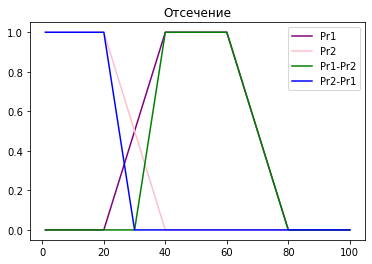

In [61]:
def FS_cut(FSs): 
    # Создаем пустое множество U, в которое мы будем добавлять уникальные значения из всех нечетких множеств 
    U=set() 
    for FS in FSs: # Проходим по каждому нечеткому множеству FS в списке FSs 
      U=set.union(U, FS.keys()) # Объединяем множество U с ключами текущего нечеткого множества FS 
    res=dict() 
    for el in U: # Проходим по каждому значению el в объединенном множестве U 
      s_mu=[] # Создаем пустой список s_mu, в который будем добавлять совместные степени принадлежности для каждого нечеткого множества 
      for FS in FSs: 
        s_mu.append(FS.get(el, 0)) # Добавляеm 
      # Результат добавляем в список s_mu 
      res[el] = 0 if s_mu[0]<s_mu[1] else s_mu[0]-s_mu[1] 
    return res 
 
FS_plot([Pr1, Pr2, FS_cut([Pr1, Pr2]), FS_cut([Pr2, Pr1])], 
        labels=[u'Pr1', u'Pr2', u'Pr1-Pr2', u'Pr2-Pr1'], title=u'Отсечение')

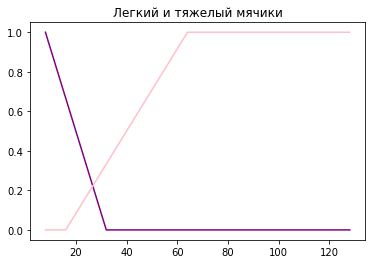

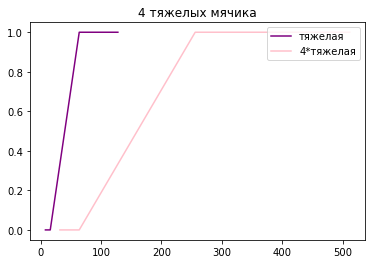

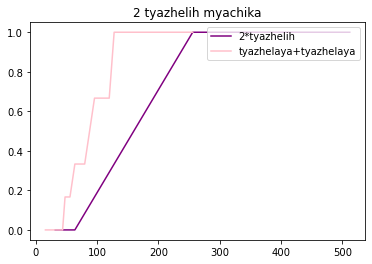

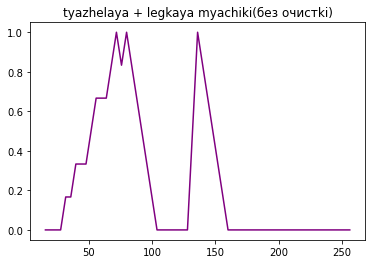

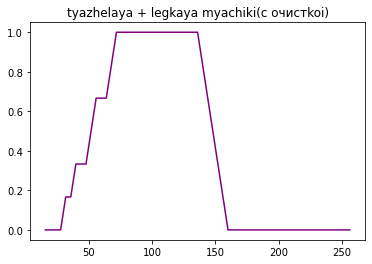

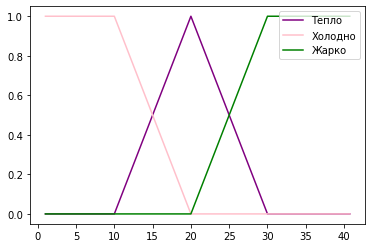

In [62]:
# Создаем массив Myachiki с заданными значениями
Myachiki=np.array([8., 12., 16., 24., 32., 48., 64., 72., 128.])

# Вычисляем нечеткое множество l_Myachik для массива Myachiki с использованием треугольной функции принадлежности и заданными параметрами
l_Myachik=triangle_FS(Myachiki, b=8., d=32., h=1, form='equal')

# Вычисляем нечеткое множество h_Myachik для массива Myachiki с использованием треугольной функции принадлежности и заданными параметрами
h_Myachik=triangle_FS(Myachiki, b=16., d=64., h=1, form='greater')

# Строим график для нечетких множеств l_Myachik и h_Myachik с заголовком 'Легкий и тяжелый мячики'
FS_plot([l_Myachik, h_Myachik], title=u'Легкий и тяжелый мячики')

# Вычисляем нечеткое множество h4_Myachik путем арифметической операции умножения h_Myachik на 4
h4_Myachik=FS_arifm_operation_Num(h_Myachik, 4, Func= lambda x,y: x*y)

# Строим график для нечетких множеств h_Myachik и h4_Myachik с заголовком '4 тяжелых мячика'
FS_plot([h_Myachik, h4_Myachik], labels=[u'тяжелый', u'4*тяжелый'], title=u'4 тяжелых мячика')

# Выполняем арифметическую операцию над нечетким множеством h_Myachik, умножая на 2 и выполняя очистку
h32_Myachik=FS_arifm_operation_Set(h_Myachik, h_Myachik, clearing=True)

# Строим график для нечетких множеств h4_Myachik и h32_Myachik с заголовком '2 тяжелых мячика'
FS_plot([h4_Myachik, h32_Myachik], labels=[u'2*tyazhelih', u'tyazhelaya+tyazhelaya'], title=u'2 tyazhelih myachika')

# Выполняем арифметическую операцию над нечеткими множествами l_Myachik и h_Myachik, складывая их
lh_Myachiki=FS_arifm_operation_Set(l_Myachik, h_Myachik)

# Строим график для нечеткого множества lh_Myachiki с заголовком 'тяжелая + легкая мячики (без очистки)'
FS_plot([lh_Myachiki], title=u'tyazhelaya + legkaya myachiki(без очистki)')

# Выполняем арифметическую операцию над нечеткими множествами l_Myachik и h_Myachik, складывая их и выполняя очистку
lhc_Myachiki=FS_arifm_operation_Set(l_Myachik, h_Myachik, clearing=True)

# Строим график для нечеткого множества lhc_Myachiki с заголовком 'тяжелая + легкая мячики (с очисткой)'
FS_plot([lhc_Myachiki], title=u'tyazhelaya + legkaya myachiki(с очистkoi)')

# Задаем значения Stemp от 1 до 40 с шагом 0.25
Stemp = np.arange(1, 41, 0.25)

# Вычисляем нечеткое множество Teplo для массива Stemp с использованием треугольной функции принадлежности и заданными параметрами
Teplo=triangle_FS(Stemp, a=10, b=20, d=30)

# Вычисляем нечеткое множество Holodno для массива Stemp с использованием треугольной функции принадлежности и заданными параметрами
Holodno=triangle_FS(Stemp, a=10, b=20, d=30, form='less')

# Вычисляем нечеткое множество Zharko для массива Stemp с использованием треугольной функции принадлежности и заданными параметрами
Zharko=triangle_FS(Stemp, a=10, b=20, d=30, form='greater')

# Строим график для нечетких множеств Teplo, Holodno и Zharko с заголовком 'Тепло, Холодно, Жарко'
FS_plot([Teplo, Holodno, Zharko], labels=[u'Тепло', u'Холодно', u'Жарко'])

#### Пример работы нечеткого вывода (алгоритм Mamdani) для разработанных правил

**Фаззификация** - переход от физических переменных к лингвистическим переменным и их характеристическим функциям. Фаззификация может быть осуществлена путем выполнения следующих шагов:  

- Шаг 1. Для каждого терма взятой лингвистической переменной находится числовое значение физической величины (или диапазон значений), наилучшим образом характеризующей данный терм и этим значениям присваивается характеристическое значение равное “1”.  
- Шаг 2. Для каждого терма выбирается диапазон значений физической переменной при которых характеристическая функция принимает значение “0”.  
- Шаг 3. После определения экстремальных значений определяются промежуточные значения характеристических функций путем выбора типовых функций.

**Критерии оценки:**
1. Если все температуры высокие, то кофе горячий.
2. Если все температуры средние, то кофе теплый.
3. Если все температуры низкие, то кофе чуть менее теплый.

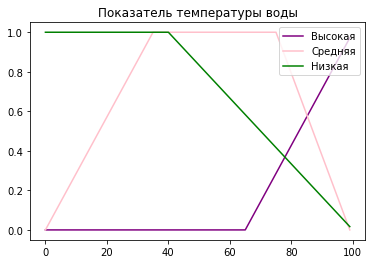

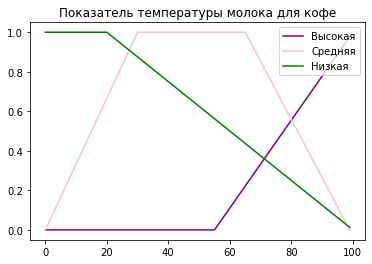

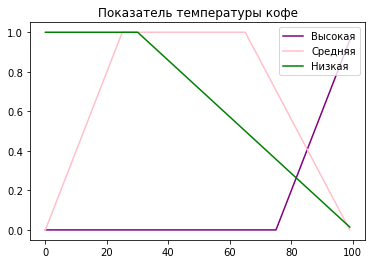

0.21428571428571427 0.4117647058823529 0.4


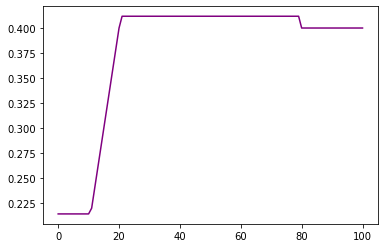

Высота=  0.4117647058823529
Мощность=  101
Диапазон значений:  (0.0, 100.0)
Максимумы:  (21.0, 50.0, 79.0)
Центр тяжести=  53.26669603524231
Момент инерции=  28784.456171769147
Размытость: 
Энтропийная мера=  (52.60213809742057, 1.041626496978625)
Альтернатива 1 (линейная)=  0.7554705050336964
Альтернатива 2 (квадратичная)=  0.7672133514677953


In [63]:
T_P=np.arange(0., 100., 1.)
T_high=triangle_FS(T_P, b=65., d=100., h=1, form='greater')
T_middle=triangle_FS(T_P, b=35., c=75., h=1, form='equal')
T_low=triangle_FS(T_P, a=40., b=100., h=1, form='less')
FS_plot([T_high, T_middle, T_low], labels=[u'Высокая', u'Средняя', u'Низкая'], title=u'Показатель температуры воды')

M_T=np.arange(0., 100., 1.)
T_high=triangle_FS(M_T, b=55., d=100., h=1, form='greater')
T_middle=triangle_FS(M_T, b=30., c=65., h=1, form='equal')
T_low=triangle_FS(M_T, a=20., b=100., h=1, form='less')
FS_plot([T_high, T_middle, T_low], labels=[u'Высокая', u'Средняя', u'Низкая'], title=u'Показатель температуры молока для кофе')

C_T=np.arange(0., 100., 1.)
T_high=triangle_FS(C_T, b=75., d=100., h=1, form='greater')
T_middle=triangle_FS(C_T, b=25., c=65., h=1, form='equal')
T_low=triangle_FS(C_T, a=30., b=100., h=1, form='less')
FS_plot([T_high, T_middle, T_low], labels=[u'Высокая', u'Средняя', u'Низкая'], title=u'Показатель температуры кофе')

T=85 #Пусть температура
R=3.5 #Пусть расход эенергии для нагревания
pp1=F_And([T_low[T], R_low[R]])
pp2=T_middle[T]
pp3=F_Or([T_high[T], R_high[R]])
print (pp1, pp2, pp3)
res_minmax=FS_union([P_low, P_middle, P_high], Ps=[pp1, pp2, pp3])
FS_plot([res_minmax])
r=FS_describe(res_minmax)

**Критерии оценки:**
1. Если отпуск длинный, то уровень вредности начальства высокий.
2. Если отпуск обычный, то уровень вредности начальства низкий.

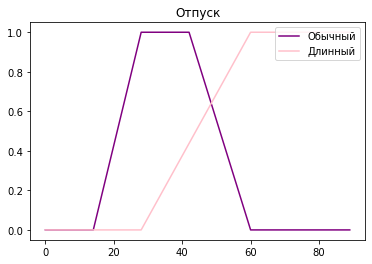

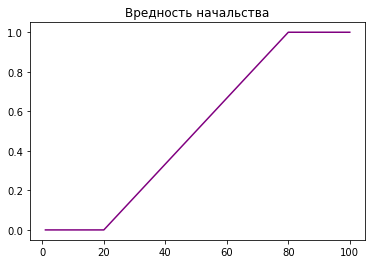

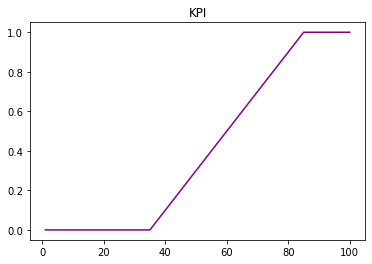

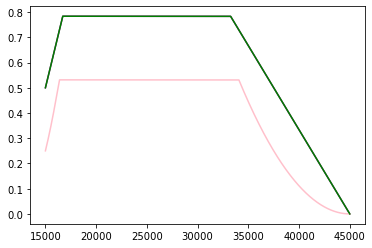

'\nЭтот код выполняет ряд операций с нечеткими множествами, такими как создание функций принадлежности \nдля различных параметров, применение операций отсечения, объединения и композиции, а также вычисление \nсредневзвешенного значения по композиции.\n'

In [65]:
# Создание массивов значений для времени отпуска и зарплаты
vacation = np.arange(0., 90., 1.)
otpusknie = np.arange(15000, 45000, 1)

# Вычисление треугольных функций принадлежности для типов отпуска: обычный и длинный
obich_vac = triangle_FS(vacation, a=14., b=28., c=42., d=60., h=1)
dlinniy_otpusk = triangle_FS(vacation, b=28., d=60., h=1, form='greater')

# Построение графиков функций принадлежности для типов отпуска
FS_plot([obich_vac, dlinniy_otpusk], labels=[u'Обычный', u'Длинный'], title=u'Отпуск')

# Вычисление треугольной функции принадлежности для высокой зарплаты в отпуске
high_otp = triangle_FS(otpusknie, a=12000, b=18000, c=30000)
# Применение квантификатора "очень" к высокой зарплате в отпуске
very_high_otp = FS_quantificator(high_otp, quantificators=['очень'])

# Создание массивов значений для вредности начальства и KPI
vrednostt = np.arange(1, 101, 1)
vrednost = triangle_FS(vrednostt, b=20, d=80, h=1, form='greater')
kpi = np.arange(1, 101, 1)
kpi_p = triangle_FS(kpi, b=35, d=85, h=1, form='greater')э

# Построение графиков функций принадлежности для вредности начальства и KPI
FS_plot([vrednost], title='Вредность начальства')
FS_plot([kpi_p], title='KPI')

# Вычисление степени истинности для предпосылок каждого правила
otpusk = 45
vredn = 67
kpi_p = 77
vac_m = obich_vac[otpusk]
vac_m_h = dlinniy_otpusk[otpusk]
vre = vrednost[vredn]
kppi = kpi[kpi_p]

# Отсечение для логического вывода
alpha = min(vac_m, vre)
alphaa = min(vac_m_h, kppi)

# Выполнение объединения функций принадлежности для высокой зарплаты в отпуске
aaa = FS_union([high_otp], [alpha])
# Выполнение объединения функций принадлежности для очень высокой зарплаты в отпуске
aaaa = FS_union([very_high_otp], [alphaa])

# Композиция объединенных функций принадлежности
comp = FS_union([aaa, aaaa])

# Построение графиков для объединенных функций принадлежности
FS_plot([aaa, aaaa, comp])

# Вычисление средневзвешенного значения по композиции
aaaaa = np.sum([x * comp[x] for x in comp]) / np.sum([comp[x] for x in comp])
aaaaa

'''
Этот код выполняет ряд операций с нечеткими множествами, такими как создание функций принадлежности 
для различных параметров, применение операций отсечения, объединения и композиции, а также вычисление 
средневзвешенного значения по композиции.
'''